<a href="https://colab.research.google.com/github/vimer3/Image_Classification/blob/main/Progetto_Finale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DEEP LEARNING PROJECT

**Gianni Valena** n.mat: 5111292 \
**Alessandro Vimercati** n.mat: 5112557

[Dataset Kaggle](https://www.kaggle.com/datasets/l33tc0d3r/indian-food-classification)

# Library

In [ ]:
!pip install d2l==1.0.0a1.post0
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.0/93.0 KB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.9/120.9 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
from d2l import torch as d2l
import torchvision
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torch.nn as nn
from torch.utils.data import random_split
import torch.nn.functional as F
from torchvision.utils import make_grid
import os
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import shutil
import PIL
from PIL import Image
import torchvision.transforms as transforms
import torch.utils.data as data
from torchvision.datasets import ImageFolder
import pandas as pd

from sklearn.model_selection import KFold
from matplotlib.image import imread
import random
import pathlib

# Dataset Loading

Our full dataset has been uploading on drive, so we are now going to connet our Notebook to the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
!ls "/content/drive/My Drive"

Mounted at /content/drive
 Backup.ipynb
'Colab Notebooks'
'COMMENTI GIANNI.ipynb'
 DATADIVAS.ipynb
 Food
 Food_security
 Food_test
'GIANNI-Rcodenil Progetto Indian food.ipynb'
 Models
'prova commenti GIANNI-Rcodenil Progetto Indian food.ipynb'
 sentiment
 Text_Mining


After having connet the notebook the to drive let's now change the directory to our drive:

In [ ]:
os.chdir("/content/drive/MyDrive")
os.getcwd()

'/content/drive/MyDrive'

# Data preparation
**NB: This section must be run only ONE time**\
In this section we are going to have a look to our dataset to try to find out some incorrect file or anything that need to be fixed.

Let's have a look to the number of classes of our dataset that represent the different type of Indian food




In [ ]:
os.listdir('Food')

['jalebi',
 'momos',
 'dal_makhani',
 'chapati',
 'kulfi',
 'kadai_paneer',
 'pakode',
 'samosa',
 'chai',
 'paani_puri',
 'pav_bhaji',
 'kaathi_rolls',
 'butter_naan',
 'fried_rice',
 'chole_bhature',
 'idli',
 'pizza',
 'burger',
 'dhokla',
 'masala_dosa']

In [ ]:
len(os.listdir('Food'))

20

Now let's check how many images of the different Indian food we have in the dataset:

In [ ]:
for i in os.listdir('Food'):
  # Set the path to the folder containing the images
  path = 'Food/'+i

  counter=0
  for file_name in os.listdir(path):
    if file_name.endswith('.jpg'):
        counter +=1
  print(counter, path)

293 Food/jalebi
319 Food/momos
319 Food/dal_makhani
413 Food/chapati
234 Food/kulfi
419 Food/kadai_paneer
278 Food/pakode
261 Food/samosa
381 Food/chai
130 Food/paani_puri
353 Food/pav_bhaji
293 Food/kaathi_rolls
328 Food/butter_naan
353 Food/fried_rice
410 Food/chole_bhature
306 Food/idli
261 Food/pizza
309 Food/burger
289 Food/dhokla
311 Food/masala_dosa


As you can see, there are several problems to solve, such as the different class lengths, the minimum number of images and the possible presence of incorrect values.
In order to have a good dataset to work on we will perform the following steps:

1.   Remove the two folders that have less than 260 images(paani_puri and kulfi).
2.   Check for files that aren't *.jpg*.
3.   Set the maximum number of images per class to 300 for those classes with more than 300 images.



## 1. Remove the two folders that have less than 260 images

In [ ]:
shutil.rmtree('Food/paani_puri')
shutil.rmtree('Food/kulfi')

Check if the code succeed in removing the folders

In [ ]:
len(os.listdir('Food'))

18

## 2. Check for files that aren't .jpg

In [ ]:
for i in os.listdir('Food'):

  path = 'Food/'+i
  counter=0
  for file_name in os.listdir(path):
    if not file_name.endswith('.jpg'):
        counter +=1
  print(i,counter)

jalebi 4
momos 0
dal_makhani 2
chapati 0
kadai_paneer 0
pakode 0
samosa 1
chai 0
pav_bhaji 0
kaathi_rolls 0
butter_naan 1
fried_rice 2
chole_bhature 1
idli 4
pizza 0
burger 0
dhokla 0
masala_dosa 0


The code above shows the number of images that are not in .jpg format, since we have just few images in the incorrect extension we can remove them from the dataset (before setting the maximum lenght to 300).

In [ ]:
for i in os.listdir('Food'):
  path = 'Food/'+i
  for file_name in os.listdir(path):
    if not file_name.endswith('.jpg'):
        os.remove('Food/'+i+'/'+file_name)
        print(file_name)

014.JPG
018.png
008.JPG
028.JPG
012.JPG
006.JPG
006.JPG
024.JPG
024.jpeg
010.jpeg
015.JPG
011.JPG
005.cms
019.JPG
014.JPG


## 3. Set the maximum number of images per class to 300.

Create a dataframe with all the names and the length of the classes

In [ ]:
name = []
length = []

for i in os.listdir('Food'):
  name.append(i)
  length.append(len(os.listdir('Food/'+i)))

In [ ]:
dictionary = {'Food': name, 'images': length}
table = pd.DataFrame(data = dictionary)
table = table.sort_values('images')
table = table.reset_index( drop=True)
table

,Food,images
0,pizza,261
1,samosa,261
2,pakode,278
3,dhokla,289
4,jalebi,293
5,kaathi_rolls,293
6,idli,306
7,burger,309
8,masala_dosa,311
9,dal_makhani,319


 now we are going to create another DataFrame with only the classes with more than 300 images

In [ ]:
more_than_300 = table[['Food', 'images']][table['images'] > 300]
more_than_300

,Food,images
6,idli,306
7,burger,309
8,masala_dosa,311
9,dal_makhani,319
10,momos,319
11,butter_naan,328
12,fried_rice,353
13,pav_bhaji,353
14,chai,381
15,chole_bhature,410


create a list of list contaning a random selection of indices with the range corresponding to the number of element exceeding the threshold we decided before


In [ ]:
import numpy as np
np.random.seed(10)
index = []

for i in range(more_than_300.shape[0]):
  imgs = np.random.choice(more_than_300.iloc[i, 1], size = more_than_300.iloc[i, 1]-300, replace=False)
  imgs = list(imgs)
  index.append(imgs)

Removing the images exceeding the maximum

In [ ]:
l = 0

for file in more_than_300['Food']:
  file_path = 'Food/' + file
  imgs_list = os.listdir(file_path)

  for k in index[l]:
    path_img = file_path + '/' + imgs_list[k]
    os.remove(path_img)

  l += 1

Create now the final dataset with all the data cleaning

In [ ]:
folder_name = []
folder_length = []

for i in os.listdir('Food'):
  folder_name.append(i)
  folder_length.append(len(os.listdir('Food/' + i)))

folder_data = {'Food': folder_name, 'images': folder_length}
table = pd.DataFrame(data = folder_data)

table

,Food,images
0,jalebi,293
1,momos,300
2,dal_makhani,300
3,chapati,300
4,kadai_paneer,300
5,pakode,278
6,samosa,261
7,chai,300
8,pav_bhaji,300
9,kaathi_rolls,293


# Split of the dataset into TRAIN and TEST
To evalueate the performance of our algorithm and to avoid overfitting we split our dataset into *Train* and *Test*.\
In order to do this we start create a copy of our clean dataset that we rename **Food_Test**

In [ ]:
!cp -r Food Food_test.copy # Creation of the copy of the clean Dataset

In [ ]:
!mv Food_test.copy Food_test # Rename into Food_test

In [ ]:
# Set the path to the folder of Train and Test
train_folder = "Food"
test_folder = "Food_test"

# Set the proportion of data that will be used for testing
ratio = 0.2

# Loop through each subfolder in the data folder
for subfolder_name in os.listdir(train_folder):
    subfolder_path = os.path.join(train_folder, subfolder_name)
    if not os.path.isdir(subfolder_path):
        continue

    # gets a list of all the image files in the subdirectory that end with the extension ".jpg".
    image_files = [subfolder_path+'/' + str(f) for f in os.listdir(subfolder_path) if f.endswith('.jpg')]

    # Use train_test_split to split the image files into train and test sets
    train_files, test_files = train_test_split(image_files, test_size=ratio, random_state=20)

    # Move the train and test image files to the respective subfolders
    test_subfolder_path = os.path.join(test_folder, subfolder_name)

    for test_file in test_files:
        src_path = test_file
        test_file = test_file.replace('Food','Food_test')
        dst_path = test_file
        shutil.move(src_path, dst_path)

# Here we finally remove the element in TEST that are in the folder TRAIN
for i in os.listdir('Food'):
  path = 'Food/'+i
  for file_name in os.listdir(path):
    if file_name in (os.listdir('Food_test/'+i)):
        os.remove('Food_test/'+i+'/'+file_name)


**CHECKING LENGHT:** Now we are going to compute the number of images in each subfolder for both *Train* and *Test*



In [ ]:
folder_name = []
folder_length = []

for i in os.listdir('Food'):
  folder_name.append(i)
  folder_length.append(len(os.listdir('Food/' + i)))

folder_length_test = []

for i in os.listdir('Food_test'):
  folder_length_test.append(len(os.listdir('Food_test/' + i)))

folder_data = {'Classes': folder_name, 'images': folder_length,'images_test': folder_length_test}
table = pd.DataFrame(data = folder_data)

table

,Classes,images,images_test
0,jalebi,234,59
1,momos,240,60
2,dal_makhani,240,60
3,chapati,240,60
4,kadai_paneer,240,60
5,pakode,222,56
6,samosa,208,53
7,chai,240,60
8,pav_bhaji,240,60
9,kaathi_rolls,234,59


**CHECKING IMAGES DIMENSION**

In [ ]:
path = 'Food/' + 'burger'

for file_name in os.listdir(path)[0:20]:
      image_path = os.path.join(path, file_name)
      with Image.open(image_path) as img:
          print(f"Image {file_name} has dimensions {img.size}")

Image 001.jpg has dimensions (3456, 3456)
Image 002.jpg has dimensions (1200, 800)
Image 004.jpg has dimensions (500, 500)
Image 005.jpg has dimensions (1200, 1800)
Image 006.jpg has dimensions (1200, 1800)
Image 007.jpg has dimensions (2500, 1544)
Image 009.jpg has dimensions (1280, 720)
Image 011.jpg has dimensions (1600, 900)
Image 008.jpg has dimensions (760, 580)
Image 019.jpg has dimensions (1400, 1400)
Image 021.jpg has dimensions (4134, 2892)
Image 015.jpg has dimensions (600, 400)
Image 017.jpg has dimensions (1100, 825)
Image 020.jpg has dimensions (1200, 630)
Image 013.jpg has dimensions (1200, 900)
Image 012.jpg has dimensions (1200, 900)
Image 016.jpg has dimensions (960, 408)
Image 023.jpg has dimensions (1986, 1324)
Image 022.jpg has dimensions (500, 500)
Image 026.jpg has dimensions (1200, 900)


We can see that the images have very different size, so before train the model with our images we will perform also a risize of them, in order to have the same size for all the images and also to have input data with a smaller dimension with the aim to have a reduction in the complexity during the training process.

# Visualization of images

We want to have a look to some random images from each sublfolder of our dataset:

In [ ]:
#create a unique list with all the classes
data_dir = pathlib.Path('Food')
list_labels = os.listdir('Food')

printing_list = []
for i in range(18):
  printing_list.append(list(data_dir.glob(list_labels[i]+"/*")))

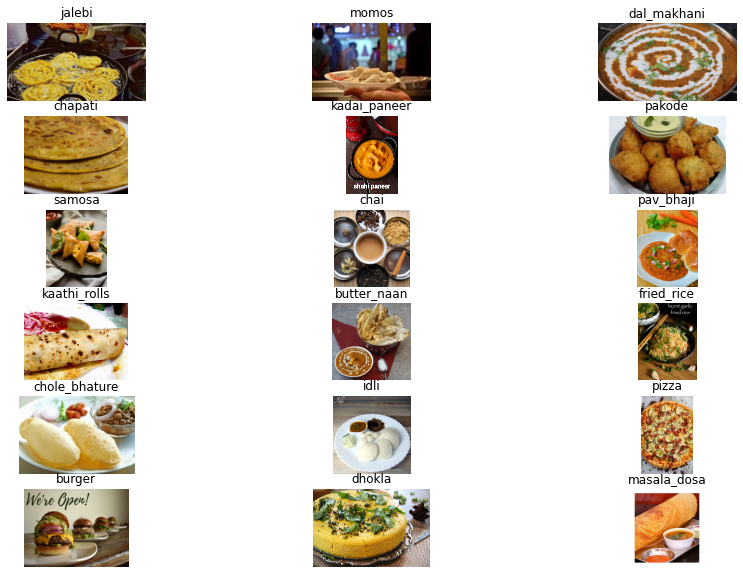

In [ ]:
plt.figure(figsize=(15,10))
random = [random.randint(0, 150) for _ in range(18)]
for i in range(len(list_labels)):
  plt.subplot(6,3,i+1)
  readable = printing_list[i][random[i]]
  plt.title(list_labels[i])
  image = imread(readable)
  plt.imshow(image)
  plt.axis("off")

We are going now to create an ImageFolder for both *Train* and *Test* in order to apply the resize to our images and then we are going to create the DataLoader.

In [ ]:
batch_size = 32

In [ ]:
# RESIZE FOR THE IMAGES IN THE TRAIN SET
path='Food' # path to train
# Define the image transforms to be applied to the images
image_transforms = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize the images to 128x128 pixels
    transforms.ToTensor(),  # Convert the images to PyTorch tensors
])
# Create a dataset from the train folder
train_dataset = ImageFolder(path, transform=image_transforms)

# Create a DataLoader more usefull for the analysis
train_dataloader = data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [ ]:
a = next(iter(train_dataloader))
a[0].shape

torch.Size([32, 3, 128, 128])

In [ ]:
# RESIZE FOR THE IMAGES IN THE TEST SET
path_test='Food_test' # path for test
# Define the image transforms to be applied to the images
image_transforms = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize the images to 128x128 pixels
    transforms.ToTensor(),  # Convert the images to PyTorch tensors
])
# Create a dataset from the test folder
test_dataset = ImageFolder(path_test, transform=image_transforms)

# Create a DataLoader more usefull for the analysis
test_dataloader = data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [ ]:
b = next(iter(train_dataloader))
b[0].shape

torch.Size([32, 3, 128, 128])

#Training function

The training function is a function that takes a training dataset as input and optimizes the model's parameters to minimize the difference between the predicted output and the actual output of the training data. The process of training a model involves iteratively adjusting the model's parameters (such as weights and biases) to reduce the error between the predicted output and the true output for each example in the training dataset.\
We will choose as benchmark to choose the best model the **Accuracy on the test.**

In [ ]:
def evaluate_accuracy_gpu(net, data_iter, device=None):
    """Compute the accuracy for a model on a dataset using a GPU."""
    if isinstance(net, torch.nn.Module):
        net.eval()  # Set the model to evaluation mode
        if not device:
            device = next(iter(net.parameters())).device
    # No. of correct predictions, no. of predictions
    metric = d2l.Accumulator(2)
    for X, y in data_iter:
        if isinstance(X, list):
            # Required if doing the fine-tuning of BERT (recurrent network)
            X = [x.to(device) for x in X]
        else:
            X = X.to(device)
        y = y.to(device)
        metric.add(d2l.accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

def train(net, train_iter, test_iter, num_epochs, lr,
              device=d2l.try_gpu()):
    """Train a model with a GPU"""
    def init_weights(m):
        if type(m) == nn.Linear or type(m) == nn.Conv2d:
            nn.init.xavier_uniform_(m.weight) # Xavier parameter initialization: a particular method (see textbook section)
    net.apply(init_weights)
    print('training on', device)

    net.to(device) # MOVE the net to the GPU (if available)
    #optimizer = torch.optim.SDG(net.parameters(), lr=lr)
    optimizer = torch.optim.Adam(net.parameters(), lr=lr)
    loss = nn.CrossEntropyLoss()
    animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0,2],
                            legend=['train loss', 'train acc', 'test acc'])
    timer, num_batches = d2l.Timer(), len(train_iter)
    for epoch in range(num_epochs):
        # Sum of training loss, sum of training accuracy, no. of examples
        metric = d2l.Accumulator(3)
        net.train() # Set the network to training mode (not evaluation mode)

        for i, (X, y) in enumerate(train_iter):
            timer.start()
            optimizer.zero_grad()
            X, y = X.to(device), y.to(device) #MOVE each minibatch of data to the GPU (if available)
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            optimizer.step()
            with torch.no_grad(): # detach gradient calculation for avoiding effect on backpropagation calculation
                metric.add(l * X.shape[0], d2l.accuracy(y_hat, y), X.shape[0])
            timer.stop()

            train_l = metric[0] / metric[2]
            train_acc = metric[1] / metric[2]
            if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
                animator.add(epoch + (i + 1) / num_batches,
                             (train_l, train_acc, None))
        test_acc = evaluate_accuracy_gpu(net, test_iter)
        animator.add(epoch + 1, (None, None, test_acc))
    print(f'loss {train_l:.3f}, train acc {train_acc:.3f}, '
          f'test acc {test_acc:.3f}')
    print(f'{metric[2] * num_epochs / timer.sum():.1f} examples/sec '
          f'on {str(device)}')

# AlexNet

In [ ]:
from d2l import torch as d2l
import torch
from torch import nn

AlexNet = nn.Sequential(
    # Here, we use a larger 11 x 11 window to capture objects. At the same
    # time, we use a stride of 4 to greatly reduce the height and width of the
    # output
    nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=1), nn.ReLU(),
    # we use 3 to match the RGB color channels in the input images
    nn.MaxPool2d(kernel_size=3, stride=2),
    # Make the convolution window smaller, set padding to 2 for consistent
    # height and width across the input and output, and increase the number of
    # output channels
    nn.Conv2d(96, 256, kernel_size=5, padding=2), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    # Use three successive convolutional layers and a smaller convolution
    # window. Except for the final convolutional layer, the number of output
    # channels is further increased. Pooling layers are not used to reduce the
    # height and width of input after the first two convolutional layers
    nn.Conv2d(256, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Flatten(),
    # Use the dropout layer to mitigate overfitting
    nn.Linear(1024, 4096), nn.ReLU(),
    nn.Dropout(p=0.1),
    nn.Linear(4096, 4096), nn.ReLU(),
    nn.Dropout(p=0.2),
    nn.Linear(4096, 18))

In [ ]:
a = torch.randn(batch_size, 3, 128, 128) # create some fake data with a tensor(size of batch, num of channel, dimensions of image)
# check the size of the tensors,
for layer in AlexNet:
    a=layer(a)
    print(layer.__class__.__name__,'Output shape:\t',a.shape)

Conv2d Output shape:	 torch.Size([32, 96, 30, 30])
ReLU Output shape:	 torch.Size([32, 96, 30, 30])
MaxPool2d Output shape:	 torch.Size([32, 96, 14, 14])
Conv2d Output shape:	 torch.Size([32, 256, 14, 14])
ReLU Output shape:	 torch.Size([32, 256, 14, 14])
MaxPool2d Output shape:	 torch.Size([32, 256, 6, 6])
Conv2d Output shape:	 torch.Size([32, 384, 6, 6])
ReLU Output shape:	 torch.Size([32, 384, 6, 6])
Conv2d Output shape:	 torch.Size([32, 384, 6, 6])
ReLU Output shape:	 torch.Size([32, 384, 6, 6])
Conv2d Output shape:	 torch.Size([32, 256, 6, 6])
ReLU Output shape:	 torch.Size([32, 256, 6, 6])
MaxPool2d Output shape:	 torch.Size([32, 256, 2, 2])
Flatten Output shape:	 torch.Size([32, 1024])
Linear Output shape:	 torch.Size([32, 4096])
ReLU Output shape:	 torch.Size([32, 4096])
Dropout Output shape:	 torch.Size([32, 4096])
Linear Output shape:	 torch.Size([32, 4096])
ReLU Output shape:	 torch.Size([32, 4096])
Dropout Output shape:	 torch.Size([32, 4096])
Linear Output shape:	 torch.Si

# LeNet

In [ ]:
class LeNet(nn.Module):
  '''
    Convolutional Neural Network
  '''
  def __init__(self):
    super().__init__()
    self.layers = torch.nn.Sequential(
        nn.Conv2d(3, 6, kernel_size=5, padding=2), nn.Sigmoid(),
        nn.AvgPool2d(kernel_size=2, stride=2),
        nn.Conv2d(6, 16, kernel_size=5), nn.Sigmoid(),
        nn.AvgPool2d(kernel_size=2, stride=2),
        nn.Flatten(),
        nn.Linear(14400, 120), nn.Sigmoid(),
        nn.Linear(120, 64), nn.Sigmoid(),
        nn.Linear(64, 18))

  def forward(self, x):
    '''Forward pass'''
    return self.layers(x)

In [ ]:
A = torch.rand(size=(32, 3, 128,128))
for layer in LeNet().layers:
    A = layer(A)
    print(layer.__class__.__name__,'output shape:\t', A.shape)

Conv2d output shape:	 torch.Size([32, 6, 128, 128])
Sigmoid output shape:	 torch.Size([32, 6, 128, 128])
AvgPool2d output shape:	 torch.Size([32, 6, 64, 64])
Conv2d output shape:	 torch.Size([32, 16, 60, 60])
Sigmoid output shape:	 torch.Size([32, 16, 60, 60])
AvgPool2d output shape:	 torch.Size([32, 16, 30, 30])
Flatten output shape:	 torch.Size([32, 14400])
Linear output shape:	 torch.Size([32, 120])
Sigmoid output shape:	 torch.Size([32, 120])
Linear output shape:	 torch.Size([32, 64])
Sigmoid output shape:	 torch.Size([32, 64])
Linear output shape:	 torch.Size([32, 18])


# GoogleNet

In [ ]:
from d2l import torch as d2l
import torch
from torch import nn

# build inception blocks
from torch.nn import functional as F

class Inception(nn.Module):
    def __init__(self, input_ch, output_ch1, output_ch2, output_ch3, output_ch4, **kwargs):
        super(Inception, self).__init__(**kwargs)
        # Build 4 parallel paths
        # Path 1: it uses a 1x1 convolutional layer
        self.p1_1 = nn.Conv2d(input_ch, output_ch1, kernel_size=1)
        # Path 2: is a 1x1 convolutional layer and it reduces the number of channels,
        # followed by a 3 x 3 convolutional layer
        self.p2_1 = nn.Conv2d(input_ch, output_ch2[0], kernel_size=1)
        self.p2_2 = nn.Conv2d(output_ch2[0], output_ch2[1], kernel_size=3, padding=1)
        # Path 3: is a 1 x 1 convolutional layer and it reduces the number of channels,
        # followed by a 5 x 5 convolutional layer
        self.p3_1 = nn.Conv2d(input_ch, output_ch3[0], kernel_size=1)
        self.p3_2 = nn.Conv2d(output_ch3[0], output_ch3[1], kernel_size=5, padding=2)
        # Path 4: is a 3 x 3 maximum pooling layer followed by a 1 x 1 convolutional layer
        self.p4_1 = nn.MaxPool2d(kernel_size=3, stride=1, padding=1)
        self.p4_2 = nn.Conv2d(input_ch, output_ch4, kernel_size=1)

    def forward(self, x):
        p1 = F.relu(self.p1_1(x))
        p2 = F.relu(self.p2_2(F.relu(self.p2_1(x))))
        p3 = F.relu(self.p3_2(F.relu(self.p3_1(x))))
        p4 = F.relu(self.p4_2(self.p4_1(x)))
        # Concatenate the outputs on the channel dimension
        return torch.cat((p1, p2, p3, p4), dim=1)

In [ ]:
b1 = nn.Sequential(nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3),
                   nn.BatchNorm2d(64),
                   nn.ReLU(),
                   nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

b2 = nn.Sequential(nn.Conv2d(64, 64, kernel_size=1),
                   nn.BatchNorm2d(64),
                   nn.ReLU(),
                   nn.Conv2d(64, 192, kernel_size=3, padding=1),
                   nn.BatchNorm2d(192),
                   nn.ReLU(),
                   nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

b3 = nn.Sequential(Inception(192, 64, (96, 128), (16, 32), 32),
                   Inception(256, 128, (128, 192), (32, 96), 64),
                   nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

b4 = nn.Sequential(Inception(480, 192, (96, 208), (16, 48), 64),
                   Inception(512, 160, (112, 224), (24, 64), 64),
                   Inception(512, 128, (128, 256), (24, 64), 64),
                   Inception(512, 112, (144, 288), (32, 64), 64),
                   Inception(528, 256, (160, 320), (32, 128), 128),
                   nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

b5 = nn.Sequential(Inception(832, 256, (160, 320), (32, 128), 128),
                   Inception(832, 384, (192, 384), (48, 128), 128),
                   nn.AdaptiveAvgPool2d((1,1)),
                   nn.Dropout(0.4),
                   nn.Flatten())

GoogleNet = nn.Sequential(b1, b2, b3, b4, b5, nn.Dropout(p=0.5), nn.Linear(1024, 18), nn.LogSoftmax(dim = 1))

In [ ]:
# show layers
X = torch.rand(size=(1, 3, 128, 128))
for layer in GoogleNet:
  X = layer(X)
  print(layer.__class__.__name__,'output shape:\t', X.shape)

Sequential output shape:	 torch.Size([1, 64, 32, 32])
Sequential output shape:	 torch.Size([1, 192, 16, 16])
Sequential output shape:	 torch.Size([1, 480, 8, 8])
Sequential output shape:	 torch.Size([1, 832, 4, 4])
Sequential output shape:	 torch.Size([1, 1024])
Dropout output shape:	 torch.Size([1, 1024])
Linear output shape:	 torch.Size([1, 18])
LogSoftmax output shape:	 torch.Size([1, 18])


# Model Performance

## **AlexNet**

loss 1.258, train acc 0.608, test acc 0.432
1117.9 examples/sec on cuda:0


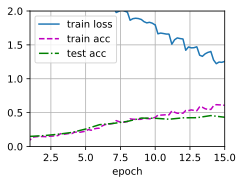

In [ ]:
lr, num_epochs = 5e-5, 15
train(AlexNet, train_dataloader, test_dataloader, num_epochs, lr, device=d2l.try_gpu())

## **LeNet**

loss 2.891, train acc 0.054, test acc 0.057
234.4 examples/sec on cpu


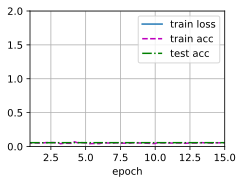

In [ ]:
lr, num_epochs = 5e-3, 15
train(LeNet(), train_dataloader, test_dataloader, num_epochs, lr, device = d2l.try_gpu())

## **GoogleNet**

loss 1.087, train acc 0.660, test acc 0.544
384.6 examples/sec on cuda:0


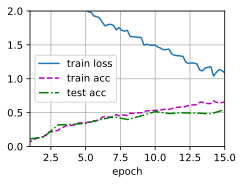

In [ ]:
lr, num_epochs = 5e-5, 15
train(GoogleNet, train_dataloader, test_dataloader, num_epochs, lr, device=d2l.try_gpu())

After testing these three models the one who seems to perform better is GoogleNet with a test accuracy of 54.4% that is a quite good result without using the data augmentation.
Since with LeNet we have obtained a very poor value of test accuracy.\
In the following section so we will try to increase the performance of GoogleNet applying the data augmentation.

# Data Augmentation

Data augmentation is a technique used in Convolutional Neural Networks to increase the diversity and size of a training dataset by creating new variations of existing training data. This helps to improve the robustness and generalization of the CNN by exposing it to a larger variety of training examples.
Data augmentation involves applying a set of transformations or modifications to the original training data, such as rotations, translations, scaling, flipping, and shearing. These modifications can be random, with a certain degree of variation, to create a new image that is still representative of the original class but different in some aspects.

In [ ]:
# set the roots
train_folder = "Food"

First augmentation:  we randomly flips the image horizontally with a probability of 1, i.e., we will flip all the input images horizontally.

In [ ]:
augmentation_1 = transforms.Compose([
  transforms.ToTensor(),
  transforms.RandomHorizontalFlip(p=1),
  transforms.Resize((128,128))])

Second augmentation: we crop the image at the center with a height and width of 90 pixels and we also rotate the image by a random angle between -45 to +45 degrees.

In [ ]:
augmentation_2 = transforms.Compose([
  transforms.ToTensor(),
  transforms.CenterCrop(90),
  transforms.RandomRotation(degrees = 45),
  transforms.Resize((128,128))])

Third augmentation: We adjust the color of the images randomly by changing their brightness, contrast, and saturation, with a maximum change of 50%, 25%, and 25% respectively. The hue parameter is set to 0, which means the hue of the image is not adjusted.

In [ ]:
augmentation_3 = transforms.Compose([
  transforms.ToTensor(),
  #transforms.ColorJitter(brightness=0.25, contrast=0, saturation=0, hue=0),
  transforms.ColorJitter(brightness=0.50, contrast=0.25, saturation=0.25, hue=0),
  transforms.Resize((128,128))])

Fourth augmentation: We adjust the sharpness of  all the images by a factor of 2  This can make the edges of objects in the images more pronounced.

In [ ]:
augmentation_4 = transforms.Compose([
  transforms.ToTensor(),
  transforms.RandomAdjustSharpness(sharpness_factor=2, p=1),
  transforms.Resize((128,128))])

With the following code we are going to create five ImageFolder that apply our data augmentation to train test to obtain the new DataLoader for GoogleNet.

In [ ]:
from torchvision.datasets import ImageFolder
from torchvision import datasets

# create the final joined dataset
data_conc= []

# append to the list folders with respective transformations
data_conc.append(datasets.ImageFolder(root = train_folder, transform = augmentation_1))
data_conc.append(datasets.ImageFolder(root = train_folder, transform = augmentation_2))
data_conc.append(datasets.ImageFolder(root = train_folder, transform = augmentation_3))
data_conc.append(datasets.ImageFolder(root = train_folder, transform = augmentation_4))
data_conc.append(datasets.ImageFolder(root = train_folder, transform = image_transforms))

# concatenate the dataset
Train_loader_aug = torch.utils.data.ConcatDataset(data_conc)

new_len = len(Train_loader_aug)
print(f'New dataset length: {new_len}')


# build data loaders
batch_size_2 = 32
Train_loader_aug = data.DataLoader(Train_loader_aug, batch_size_2, shuffle=True)
Test_loader_aug = data.DataLoader(test_dataset, batch_size=batch_size_2, shuffle=True)


New dataset length: 21085


Let's now plot some images after our data augmentation

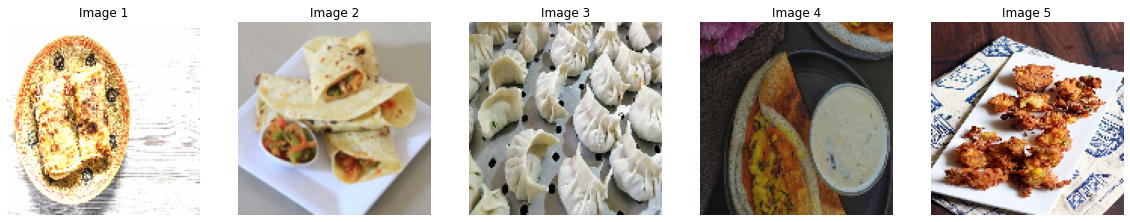

In [ ]:
images, _ = next(iter(Train_loader_aug))
images = images[:5]

# Convert the tensor to a numpy array
images = images.numpy()

# Plot the images
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i].transpose((1, 2, 0)))
    ax.set_title(f"Image {i+1}")
    ax.axis('off')




# Model Performance with Data Augmentation


Let's verify the size of the input tensor:

In [ ]:
X = next(iter(Train_loader_aug))
Z = next(iter(Test_loader_aug))

In [ ]:
print(X[0].shape)
print(Z[0].shape)

torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])


## GoogleNet with augmentation

loss 0.714, train acc 0.783, test acc 0.633
382.0 examples/sec on cuda:0


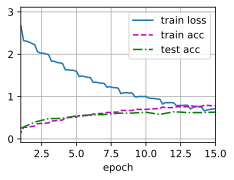

In [ ]:
lr, num_epochs = 5e-5, 15
train(GoogleNet, Train_loader_aug, Test_loader_aug, num_epochs, lr, device=d2l.try_gpu())

With the data augmentation we have improved the performance of GoogleNet obtaining a new value of test accuracy equal to 63.3%, obtaining so an increasing of the preformance of 8.9%


In [ ]:
# save the model
torch.save(GoogleNet, '/content/drive/MyDrive/Models/GoogleNet.pt')

In [ ]:
# load the model
GoogleNet_model = torch.load( '/content/drive/MyDrive/Models/GoogleNet.pt')

# Confusion Matrix - GoogleNet
We want to see how our model predict indian dishes using images from the test folder.

In [ ]:
for x, y in Test_loader_aug:
  break
pred_aug = torch.exp(GoogleNet_model(x)).argmax(axis=1)

<Axes: title={'center': 'GoogLeNet Confusion Matrix Augmented'}, xlabel='Predicted label', ylabel='True label'>

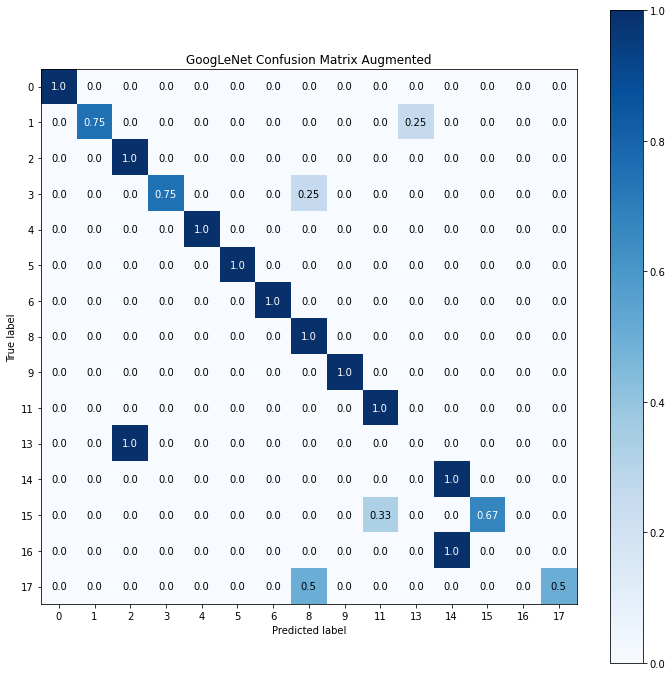

In [ ]:
# compute the confusion matrix
import scikitplot as skplt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
skplt.metrics.plot_confusion_matrix(y.cpu(), pred_aug.cpu(), normalize=True, cmap = 'Blues', figsize=(12,12), title = 'GoogLeNet Confusion Matrix Augmented')


# Possible utilities of our Algorithm:

*   Automatic price allocation: algorithm that detects the dishes taken in a buffet canteen and automatically calculates the price of lunch
*   Food Allergy Detection: An image classification model can also be used to detect potential allergens in food. Users could take a picture of their food, and the model could identify potential allergens and provide a warning.
*   Dietary Analysis: You could build an application that analyzes a user's diet based on food images. Users could take pictures of the food they eat throughout the day, and the app could track their nutritional intake and provide recommendations on how to balance their diet.




